# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy
from collections import namedtuple, deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.20999999530613422


When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
from model import Actor, Critic
from agent import Agent

In [8]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=10)

In [9]:
def ddpg(n_episodes=2000, max_t=10000):

    scores = []
    scores_deque = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]           
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)         
       
            env_info = env.step(action)[brain_name]       
            next_state = env_info.vector_observations[0]  
            reward = env_info.rewards[0]                  
            done = env_info.local_done[0]                  
            agent.step(state, action, reward, next_state, done) 
            score += reward                                
            state = next_state                             
            if done:                                      
                break
        
        scores_deque.append(score)      
        scores.append(score)            

        print('\rEpisode {} score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_deque)))
        
        print('\rAfter Episode {} average score is: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes and average score is: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

In [10]:
scores = ddpg(n_episodes=5000)

Episode 1 score: 1.99	Average Score: 1.99
After Episode 1 average score is: 1.99
Episode 2 score: 0.18	Average Score: 1.08
After Episode 2 average score is: 1.08
Episode 3 score: 0.10	Average Score: 0.76
After Episode 3 average score is: 0.76
Episode 4 score: 0.26	Average Score: 0.63
After Episode 4 average score is: 0.63
Episode 5 score: 0.00	Average Score: 0.51
After Episode 5 average score is: 0.51
Episode 6 score: 0.23	Average Score: 0.46
After Episode 6 average score is: 0.46
Episode 7 score: 1.02	Average Score: 0.54
After Episode 7 average score is: 0.54
Episode 8 score: 0.50	Average Score: 0.53
After Episode 8 average score is: 0.53
Episode 9 score: 0.64	Average Score: 0.55
After Episode 9 average score is: 0.55
Episode 10 score: 1.65	Average Score: 0.66
After Episode 10 average score is: 0.66
Episode 11 score: 0.84	Average Score: 0.67
After Episode 11 average score is: 0.67
Episode 12 score: 0.20	Average Score: 0.63
After Episode 12 average score is: 0.63
Episode 13 score: 0.79

Episode 100 score: 6.00	Average Score: 2.58
After Episode 100 average score is: 2.58
Episode 101 score: 3.83	Average Score: 2.60
After Episode 101 average score is: 2.60
Episode 102 score: 3.45	Average Score: 2.63
After Episode 102 average score is: 2.63
Episode 103 score: 4.87	Average Score: 2.68
After Episode 103 average score is: 2.68
Episode 104 score: 2.86	Average Score: 2.70
After Episode 104 average score is: 2.70
Episode 105 score: 3.93	Average Score: 2.74
After Episode 105 average score is: 2.74
Episode 106 score: 5.65	Average Score: 2.80
After Episode 106 average score is: 2.80
Episode 107 score: 2.51	Average Score: 2.81
After Episode 107 average score is: 2.81
Episode 108 score: 6.79	Average Score: 2.87
After Episode 108 average score is: 2.87
Episode 109 score: 4.77	Average Score: 2.91
After Episode 109 average score is: 2.91
Episode 110 score: 5.87	Average Score: 2.96
After Episode 110 average score is: 2.96
Episode 111 score: 4.93	Average Score: 3.00
After Episode 111 ave

Episode 196 score: 23.12	Average Score: 9.51
After Episode 196 average score is: 9.51
Episode 197 score: 6.81	Average Score: 9.56
After Episode 197 average score is: 9.56
Episode 198 score: 16.44	Average Score: 9.68
After Episode 198 average score is: 9.68
Episode 199 score: 16.74	Average Score: 9.79
After Episode 199 average score is: 9.79
Episode 200 score: 17.90	Average Score: 9.91
After Episode 200 average score is: 9.91
Episode 201 score: 21.16	Average Score: 10.08
After Episode 201 average score is: 10.08
Episode 202 score: 14.64	Average Score: 10.19
After Episode 202 average score is: 10.19
Episode 203 score: 19.25	Average Score: 10.33
After Episode 203 average score is: 10.33
Episode 204 score: 27.66	Average Score: 10.58
After Episode 204 average score is: 10.58
Episode 205 score: 20.78	Average Score: 10.75
After Episode 205 average score is: 10.75
Episode 206 score: 22.66	Average Score: 10.92
After Episode 206 average score is: 10.92
Episode 207 score: 19.70	Average Score: 11.

Episode 290 score: 32.02	Average Score: 27.04
After Episode 290 average score is: 27.04
Episode 291 score: 24.34	Average Score: 27.07
After Episode 291 average score is: 27.07
Episode 292 score: 31.76	Average Score: 27.21
After Episode 292 average score is: 27.21
Episode 293 score: 18.50	Average Score: 27.22
After Episode 293 average score is: 27.22
Episode 294 score: 36.03	Average Score: 27.39
After Episode 294 average score is: 27.39
Episode 295 score: 37.02	Average Score: 27.59
After Episode 295 average score is: 27.59
Episode 296 score: 29.34	Average Score: 27.65
After Episode 296 average score is: 27.65
Episode 297 score: 29.99	Average Score: 27.89
After Episode 297 average score is: 27.89
Episode 298 score: 38.91	Average Score: 28.11
After Episode 298 average score is: 28.11
Episode 299 score: 34.84	Average Score: 28.29
After Episode 299 average score is: 28.29
Episode 300 score: 34.85	Average Score: 28.46
After Episode 300 average score is: 28.46
Episode 301 score: 38.12	Average

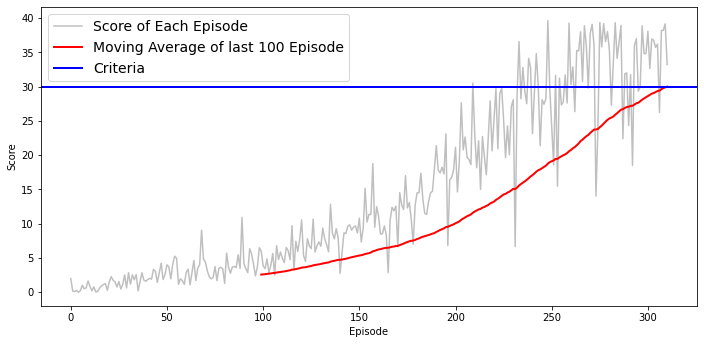

In [11]:
fig, ax = plt.subplots(1, 1, figsize=[10, 5])
plt.rcParams.update({'font.size': 14})


scores_avg = pd.Series(scores).rolling(100).mean()
ax.plot(scores, "-", c="black", alpha=0.25)
ax.plot(scores_avg, "-", c="red", linewidth=2)
ax.set_xlabel("Episode")
ax.set_ylabel("Score")
ax.axhline(30, c="blue", linewidth=2)
ax.legend(["Score of Each Episode", "Moving Average of last 100 Episode", "Criteria"])

fig.tight_layout()

In [12]:
env.close()